In [1]:
from pathlib import Path

import numpy as np
import pandas as pd


from masim_analysis import analysis, utils
from masim_analysis.configure import CountryParams


from ruamel.yaml import YAML


yaml = YAML()

country = CountryParams.load("moz")
country_code = "moz"


output = Path("output") / "moz"

In [2]:
cases = pd.read_csv(output / "validation" / "ave_cases.csv", index_col=0)

In [3]:
cases

,monthlydataid,locationid,clinicalepisodes,clinicalepisodes_0,clinicalepisodes_1,clinicalepisodes_2,clinicalepisodes_3,clinicalepisodes_4,clinicalepisodes_5,clinicalepisodes_6,...,clinicalepisodes_39,clinicalepisodes_40,clinicalepisodes_41,clinicalepisodes_42,clinicalepisodes_43,clinicalepisodes_44,clinicalepisodes_45,clinicalepisodes_46,clinicalepisodes_47,clinicalepisodes_48
0,1,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946443,156,32006,NaN,0.0,2.0,3.0,1.0,9.0,4.0,1.0,...,1.0,5.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,NaN
4946444,156,32007,NaN,4.0,2.0,2.0,4.0,3.0,2.0,2.0,...,1.0,0.0,2.0,0.0,3.0,3.0,2.0,2.0,7.0,NaN
4946445,156,32008,NaN,6.0,6.0,4.0,2.0,3.0,13.0,5.0,...,11.0,3.0,2.0,5.0,3.0,3.0,2.0,2.0,7.0,NaN
4946446,156,32009,NaN,11.0,16.0,10.0,13.0,17.0,10.0,15.0,...,11.0,10.0,2.0,5.0,6.0,10.0,6.0,19.0,6.0,NaN


In [4]:
cases_2023 = cases.loc[cases["monthlydataid"].between(144, 155)].copy()

In [5]:
len(cases_2023["monthlydataid"].unique())

12

In [6]:
cases_2023.drop(columns=["clinicalepisodes"], inplace=True)

In [7]:
cases_2023_monthly = cases_2023.groupby(["monthlydataid", "locationid"]).mean()

In [8]:
cases_2023_mean = cases_2023_monthly.groupby("locationid").sum()
cases_2023_mean["cases"] = cases_2023_mean.mean(axis=1)

In [9]:
print(f"Total cases in 2023: {cases_2023_mean[['cases']].sum().values[0] * 4:,}")

Total cases in 2023: 18,567,484.0


In [10]:
district_raster, meta = utils.read_raster(Path("data") / country_code / "moz_districts.asc")

In [11]:
pixel_ids = district_raster[~np.isnan(district_raster)].flatten()

In [12]:
pixel_ids

array([1., 1., 1., ..., 7., 7., 7.], shape=(32011,))

In [13]:
pd.Index(np.arange(len(pixel_ids)), name="locationid")

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       32001, 32002, 32003, 32004, 32005, 32006, 32007, 32008, 32009, 32010],
      dtype='int64', name='locationid', length=32011)

In [14]:
pixel_mappings = pd.DataFrame({"district": pixel_ids}, index=pd.Index(np.arange(len(pixel_ids)), name="locationid"))

In [15]:
pixel_mappings

,district
locationid,
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
32006,7.0
32007,7.0
32008,7.0


In [16]:
cases_2023_mean = cases_2023_mean.merge(pixel_mappings, left_index=True, right_index=True, how="outer")

In [17]:
cases_2023_mean = cases_2023_mean[["cases", "district"]].groupby("district").sum()

In [18]:
moz_cases = pd.read_csv(Path("data") / country_code / "Cases 2023 2024.csv")

In [19]:
moz_2023 = moz_cases.loc[moz_cases["Ano"] == 2023].copy().groupby("district").sum()
moz_2023.drop(columns={"Ano", "Provincia"}, inplace=True)

In [20]:
moz_2023

,Unadjusted Anual Cases,Adjusted Anual Cases
district,,
1,886524,9.102682e+05
2,420115,4.204072e+05
3,849633,8.578615e+05
4,994826,9.980041e+05
5,44247,4.508204e+04
6,2305415,2.306073e+06
7,818360,8.306292e+05
8,1280319,1.294764e+06
9,763085,7.813600e+05


In [21]:
district_mapping = pd.read_csv(Path("data") / country_code / "moz_mapping.csv", index_col=0)

In [22]:
district_mapping

,DISTRICT
ID,
1,Cabo_Delgado
2,Gaza
3,Inhambane
4,Manica
5,Maputo
6,Maputo_City
7,Nampula
8,Niassa
9,Sofala


In [23]:
moz_2023["proportion"] = moz_2023["Adjusted Anual Cases"].div(moz_2023["Adjusted Anual Cases"].sum())
moz_2023

,Unadjusted Anual Cases,Adjusted Anual Cases,proportion
district,,,
1,886524,9.102682e+05,0.076402
2,420115,4.204072e+05,0.035286
3,849633,8.578615e+05,0.072003
4,994826,9.980041e+05,0.083766
5,44247,4.508204e+04,0.003784
6,2305415,2.306073e+06,0.193556
7,818360,8.306292e+05,0.069717
8,1280319,1.294764e+06,0.108674
9,763085,7.813600e+05,0.065582


In [24]:
cases_2023_mean["proportion"] = cases_2023_mean["cases"].div(cases_2023_mean["cases"].sum())
cases_2023_mean

,cases,proportion
district,,
1.0,394889.102041,0.085071
2.0,897468.673469,0.193342
3.0,335576.938776,0.072293
4.0,279827.897959,0.060283
5.0,240310.510204,0.051770
6.0,277877.938776,0.059863
7.0,414768.979592,0.089354
8.0,382631.918367,0.082431
9.0,441192.346939,0.095046


In [25]:
from matplotlib import pyplot as plt

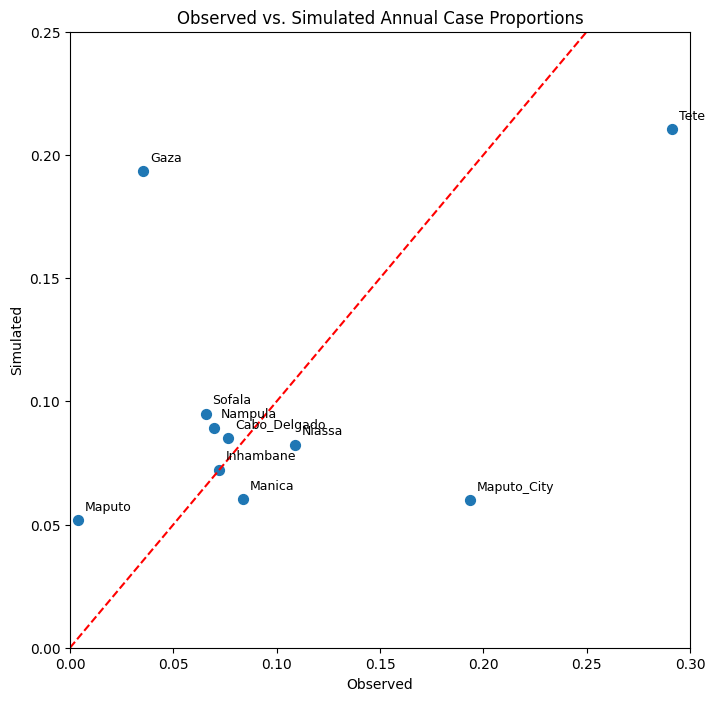

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))

# scatter points
x = moz_2023["proportion"]
y = cases_2023_mean["proportion"]
ax.scatter(x, y, s=50, color="C0")

# annotate each point with the district name (fall back to index if no name)
for idx in x.index:
    xi, yi = x.loc[idx], y.loc[idx]
    label = district_mapping.loc[idx, "DISTRICT"] if idx in district_mapping.index else str(idx)
    ax.annotate(label, (xi, yi), xytext=(5, 5), textcoords="offset points", fontsize=9, ha="left", va="bottom")
ax.plot(np.linspace(0, 1), np.linspace(0, 1), "r--")
ax.set_xlim((0, 0.3))
ax.set_ylim((0, 0.25))
ax.set_xlabel("Observed")
ax.set_ylabel("Simulated")
ax.set_title("Observed vs. Simulated Annual Case Proportions")
fig.savefig(Path("images") / "moz" / "proportions.png")

In [27]:
np.arange(0, 1, 1000)

array([0])

---

In [75]:
genotypes = analysis.get_table(output / "validation" / "moz_validation_scaled_0.37_monthly_data_0.db", "genotype")
genome_data = analysis.get_table(
    output / "validation" / "moz_validation_scaled_0.37_monthly_data_0.db", "monthlygenomedata"
)

In [76]:
genome_data.loc[genome_data["monthlydataid"] == 144]

,monthlydataid,locationid,genomeid,occurrences,clinicaloccurrences,occurrences0to5,occurrences2to10,weightedoccurrences
4848483,144,0,32,36,7,23,3,8.933333
4848484,144,0,36,1,0,1,0,0.066667
4848485,144,1,32,1,0,0,0,1.000000
4848486,144,1,36,1,0,1,1,1.000000
4848487,144,2,32,2,0,0,0,2.000000
...,...,...,...,...,...,...,...,...
4907833,144,32008,36,5,1,2,2,3.000000
4907834,144,32009,32,73,5,27,35,49.550000
4907835,144,32009,36,42,1,16,17,31.450000
4907836,144,32010,32,2,0,2,2,1.000000


In [77]:
genome_data_2022 = genome_data.copy().loc[genome_data["monthlydataid"].between(144, 155)]

In [78]:
genome_data_2022

,monthlydataid,locationid,genomeid,occurrences,clinicaloccurrences,occurrences0to5,occurrences2to10,weightedoccurrences
4848483,144,0,32,36,7,23,3,8.933333
4848484,144,0,36,1,0,1,0,0.066667
4848485,144,1,32,1,0,0,0,1.000000
4848486,144,1,36,1,0,1,1,1.000000
4848487,144,2,32,2,0,0,0,2.000000
...,...,...,...,...,...,...,...,...
5561969,155,32007,36,16,2,6,6,13.000000
5561970,155,32008,32,50,4,13,22,41.000000
5561971,155,32008,36,3,0,0,0,3.000000
5561972,155,32009,32,30,1,13,17,21.266667


In [ ]:
genome_data_2022 = (
    genome_data_2022[
        ["genomeid", "occurrences", "clinicaloccurrences", "occurrences0to5", "occurrences2to10", "weightedoccurrences"]
    ]
    .groupby("genomeid")
    .sum()
)
genome_data_2022

,occurrences,clinicaloccurrences,occurrences0to5,occurrences2to10,weightedoccurrences
genomeid,,,,,
32,24329877,1309296,10033284,8774843,1.573298e+07
36,19143438,1025245,7899535,6917114,1.240421e+07


In [80]:
genotypes.loc[genotypes["id"] == 36]

,id,name
36,36,TYY--R1


In [ ]:
genome_data_2022 = pd.DataFrame()

for file in output.glob("validation/*.db"):
    in_data = analysis.get_table(file, "monthlygenomedata")
    in_data_2022 = in_data.loc[in_data["monthlydataid"].between(144, 155)]
    in_data_2022_grouped = (
        in_data_2022[
            [
                "genomeid",
                "occurrences",
                "clinicaloccurrences",
                "occurrences0to5",
                "occurrences2to10",
                "weightedoccurrences",
            ]
        ]
        .groupby("genomeid")
        .sum()
    )
    genome_data_2022 = pd.concat([genome_data_2022, in_data_2022_grouped])

# genome_data_2022 = genome_data_2022.groupby("genomeid").mean()
genome_data_2022.to_csv(output / "validation" / "genome_data_2022_sum.csv")

/tmp/ipykernel_26187/3358918037.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  genome_data_2022 = pd.concat([genome_data_2022, in_data_2022_grouped])
/tmp/ipykernel_26187/3358918037.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  genome_data_2022 = pd.concat([genome_data_2022, in_data_2022_grouped])


In [120]:
genome_data_2022 = pd.read_csv(output / "validation" / "genome_data_2022_mean.csv", index_col=0)
genome_data_2022 = genome_data_2022.groupby("genomeid").mean() * 4
genome_data_2022 = genome_data_2022.merge(genotypes, left_index=True, right_on="id")
genome_data_2022 = genome_data_2022.drop(columns=["id"])
genome_data_2022

,occurrences,clinicaloccurrences,occurrences0to5,occurrences2to10,weightedoccurrences,name
32,267.928239,14.363223,110.618170,96.707271,173.386846,TNY--R1
36,219.363355,11.770177,90.549329,79.164566,141.970184,TYY--R1


In [ ]:
genome_records = pd.read_csv("data/moz/moz genome data.csv")
genome_records = genome_records[
    ["gene", "locus", "allele", "n_total_samples_collected_day_0", "n_carriers_identified_day_0", "frequency"]
]
genome_records

,gene,locus,allele,n_total_samples_collected_day_0,n_carriers_identified_day_0,frequency
0,pfmdr1,184,Y,270,61,0.225926
1,pfmdr1,184,F,270,209,0.774074
2,pfcrt,76,K,273,272,0.996337
3,pfcrt,76,T,273,1,0.003663
4,pfmdr1,184,Y,343,101,0.294461
5,pfmdr1,184,F,343,242,0.705539
6,pfcrt,76,K,342,342,1.000000
7,pfcrt,76,T,342,0,0.000000
8,pfmdr1,184,Y,190,76,0.400000
9,pfmdr1,184,F,190,114,0.600000


### Reported Allele Frequencies in 2022

In [ ]:
genome_records = genome_records.groupby(["gene", "locus", "allele"]).sum()
genome_records["frequency"] = (
    genome_records["n_carriers_identified_day_0"] / genome_records["n_total_samples_collected_day_0"]
)
genome_records

n_total_samples_collected_day_0  \
gene   locus allele                                    
pfcrt  76    K                                   804   
             T                                   804   
pfmdr1 184   F                                   803   
             Y                                   803   

                     n_carriers_identified_day_0  frequency  
gene   locus allele                                          
pfcrt  76    K                               803   0.998756  
             T                                 1   0.001244  
pfmdr1 184   F                               565   0.703611  
             Y                               238   0.296389

### Simulation Allele Frequencies in 2022

In [119]:
genome_data_2022["frequency"] = genome_data_2022["clinicaloccurrences"] / genome_data_2022["occurrences"]
genome_data_2022

,occurrences,clinicaloccurrences,occurrences0to5,occurrences2to10,weightedoccurrences,name,frequency
32,267.928239,14.363223,110.618170,96.707271,173.386846,TNY--R1,0.053608
36,219.363355,11.770177,90.549329,79.164566,141.970184,TYY--R1,0.053656


In [122]:
genome_data_2022["occurrences"].sum()

np.float64(487.29159461851225)

TNY--R1: pfcrt + pfmdr1

TYY--R1: pfcrt + pfmdr1